# Partial Least Squares (PLS)
https://funatsu-lab.github.io/open-course-ware/machine-learning/partial-least-squares/

線形回帰手法の一種

回帰分析に広く用いられる

説明変数を互いに無相関に線形変換した変数（潜在変数）を用いるのが特徴

- 共線性に対応できる
- サンプル数が説明変数よりも少ない場合でもモデルを構築できる
- ノイズに強い


In [30]:
import numpy as np
import matplotlib.pyplot as plt
X1 = np.random.rand(200)*2
X1 = np.sort(X1)
X2 = np.random.rand(200)*10
X3 = 5*X1 + np.random.rand(200)*1.0
X4 = 11 * np.random.rand(200)
X4 = np.sort(X4)
y = 2*X1 + 9*X3 + X4 + np.random.rand(200)*10 # 最後はノイズ

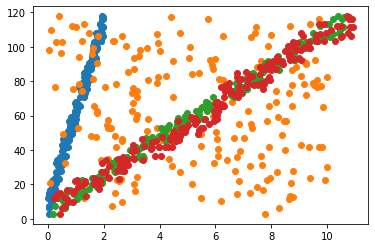

In [31]:
plt.plot(X1, y, 'o')
plt.plot(X2, y, 'o')
plt.plot(X3, y, 'o')
plt.plot(X4, y, 'o')

In [32]:
from sklearn.cross_decomposition import PLSRegression
pls = PLSRegression(n_components=3) #PLSの成分数

In [38]:
X1 = X1.reshape(-1,1)
X2 = X2.reshape(-1,1)
X3 = X3.reshape(-1,1)
X4 = X4.reshape(-1,1)
y = y.reshape(-1,1)
X = np.concatenate([X1,X2], axis=1)
X = np.concatenate([X, X3], axis=1)
X = np.concatenate([X, X4], axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
print(X)

[[ 0.0214571   1.31250769  0.43686547  0.20908816]
 [ 0.02901536  5.49880532  0.38053459  0.29702965]
 [ 0.02955149  6.76415871  0.95433246  0.33862349]
 [ 0.02983559  7.77373496  0.18953949  0.42306614]
 [ 0.03628511  7.23639561  0.65746635  0.4375549 ]
 [ 0.038285    8.26477618  0.59947468  0.51871252]
 [ 0.04847881  8.77737187  0.5602672   0.58006764]
 [ 0.04874851  2.30927908  0.25459392  0.62745927]
 [ 0.06593408  7.71740961  0.79333128  0.67656628]
 [ 0.09416502  8.62317768  1.06106568  0.69562788]
 [ 0.09737553  6.19263945  0.55311709  0.70869003]
 [ 0.13006754  2.38842781  1.08321918  0.90357313]
 [ 0.15021662  2.66079078  0.75578551  0.90413584]
 [ 0.1512489   3.10975196  1.29159233  0.95523075]
 [ 0.16132451  6.84315495  1.77766154  0.97311691]
 [ 0.16995268  7.85887521  1.22247022  1.03619219]
 [ 0.19525226  7.47965725  1.74736025  1.06385652]
 [ 0.19654836  1.84778721  1.70122856  1.22656872]
 [ 0.19792985  2.54639231  1.95561408  1.32859816]
 [ 0.20419287  0.0835984   1.22

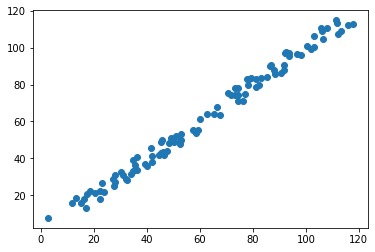

In [49]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler()
y_scaler = StandardScaler()
X_train_scaled = X_scaler.fit_transform(X_train)
y_train_scaled = y_scaler.fit_transform(y_train)
pls.fit(X_train_scaled, y_train_scaled)
X_test_scaled = X_scaler.transform(X_test)
y_pred = y_scaler.inverse_transform(pls.predict(X_test_scaled))
plt.plot(y_test, y_pred, 'o')

#どの変数が予測に重要かを知りたい

PLSモデルではモデルの標準回帰係数を求めることで、どの変数が重要であるかを判断できる

PLSの標準回帰係数を以下の式で表せる：

b=W(PTW)−1q

[ 0.24477085  0.00151863  0.77667951 -0.01916894]


<BarContainer object of 4 artists>

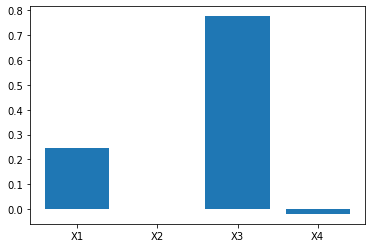

In [73]:
coef = pls.coef_.reshape(1,-1)[0]
x = np.array(['X1', 'X2', 'X3', 'X4'])
print(coef)
plt.bar(x, coef)